#### Title: "Part 2 EDA"
#### Author: "Ismael Bah"
#### Date: "6/16/2024"

# Objectives

The primary objective of this project is to build regression models to predict GDP per Capita based on various economic indicators. After initial exploratory data analysis (EDA), I realized that including data from countries with low GDPs was skewing the results. Therefore, I decided to focus on a single country, China, and collected data over a period of 54 years. The analysis will use GDP per Capita (US$) as the dependent variable, with the following independent variables: CleanFuelAccessRate, GDPPerCapitaGrowthRate, ImportsGDPRate, IndustryGrowthRate, InflationRate, LaborForce, LifeExpectancy, PopulationGrowthRate, TradeGDPRate, UnemploymentRate, GDPGrowthInflationInteraction, and HighGDPPerCapita. By concentrating on China and utilizing extensive historical data, we aim to provide insights that are both accurate and actionable, contributing to a deeper understanding of economic growth patterns and predictors.

In [1]:
# load libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
df = pd.read_csv('original_df.csv')
df.head() # display the first 5 rows of the dataset

,Country Name,Country Code,Series Name,Series Code,1970,1971,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,113.1625778,118.654144,131.8855585,157.0891109,160.1476879,178.3396141,...,7636.07434,8016.445595,8094.390167,8817.045608,9905.406383,10143.86022,10408.71955,12617.5051,12720.21632,..
1,China,CHN,Population growth (annual %),SP.POP.GROW,2.761675566,2.74691555,2.45735693,2.283395364,2.065955013,1.766391782,...,0.63032639,0.581456147,0.573050906,0.605245013,0.467672053,0.35474089,0.23804087,0.0892522,-0.013099501,..
2,China,CHN,"Labor force, total",SL.TLF.TOTL.IN,..,..,..,..,..,..,...,780062420,780709584,780524312,778674707,776278514,775321104,763684716,780370660,781808304,779890786
3,China,CHN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,..,..,..,..,..,..,...,4.1,..,..,3.9,4.93,5.15,5.61,5.11,..,..
4,China,CHN,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,..,..,..,..,..,..,...,1.921641628,1.437023809,2.000001822,1.593136001,2.0747904,2.899234164,2.419421895,0.981015136,1.973575557,..


Upon loading the dataset, I realized that it needs to be reshaped and organized to make it more user-friendly and easier to read. To address this, I will use the melt and pivot functions to transform the dataset into a more manageable format. This reorganization will be followed by essential EDA steps such as cleaning the data, renaming columns for clarity, and finding, filling, or removing any missing values. Additionally, I will perform feature engineering by creating new features based on existing columns. These steps are crucial to prepare the dataset for regression models, ensuring it is well-structured and ready for accurate analysis.

In [3]:
# check columns data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   13 non-null     object
 1   Country Code   13 non-null     object
 2   Series Name    13 non-null     object
 3   Series Code    13 non-null     object
 4   1970           13 non-null     object
 5   1971           13 non-null     object
 6   1972 [YR1972]  13 non-null     object
 7   1973 [YR1973]  13 non-null     object
 8   1974 [YR1974]  13 non-null     object
 9   1975 [YR1975]  13 non-null     object
 10  1976 [YR1976]  13 non-null     object
 11  1977 [YR1977]  13 non-null     object
 12  1978 [YR1978]  13 non-null     object
 13  1979 [YR1979]  13 non-null     object
 14  1980 [YR1980]  13 non-null     object
 15  1981 [YR1981]  13 non-null     object
 16  1982 [YR1982]  13 non-null     object
 17  1983 [YR1983]  13 non-null     object
 18  1984 [YR1984]  13 non-null     o

In [4]:
# Function to clean column names
def clean_column_name(col):
    if '[' in col and 'YR' in col and ']' in col:
        return col.split(' ')[0]
    return col

# Apply the function to all column names
df.columns = [clean_column_name(col) for col in df.columns]

# Display the cleaned DataFrame columns
print(df.columns)

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')


In [5]:
# Display the first 5 rows after cleaned column names
df.head()

,Country Name,Country Code,Series Name,Series Code,1970,1971,1972,1973,1974,1975,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,113.1625778,118.654144,131.8855585,157.0891109,160.1476879,178.3396141,...,7636.07434,8016.445595,8094.390167,8817.045608,9905.406383,10143.86022,10408.71955,12617.5051,12720.21632,..
1,China,CHN,Population growth (annual %),SP.POP.GROW,2.761675566,2.74691555,2.45735693,2.283395364,2.065955013,1.766391782,...,0.63032639,0.581456147,0.573050906,0.605245013,0.467672053,0.35474089,0.23804087,0.0892522,-0.013099501,..
2,China,CHN,"Labor force, total",SL.TLF.TOTL.IN,..,..,..,..,..,..,...,780062420,780709584,780524312,778674707,776278514,775321104,763684716,780370660,781808304,779890786
3,China,CHN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,..,..,..,..,..,..,...,4.1,..,..,3.9,4.93,5.15,5.61,5.11,..,..
4,China,CHN,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,..,..,..,..,..,..,...,1.921641628,1.437023809,2.000001822,1.593136001,2.0747904,2.899234164,2.419421895,0.981015136,1.973575557,..


In [6]:
# Convert all year columns to numeric before melting the DataFrame
year_columns = [str(year) for year in range(1970, 2024)]
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')

In [7]:
df.dtypes

Country Name     object
Country Code     object
Series Name      object
Series Code      object
1970            float64
1971            float64
1972            float64
1973            float64
1974            float64
1975            float64
1976            float64
1977            float64
1978            float64
1979            float64
1980            float64
1981            float64
1982            float64
1983            float64
1984            float64
1985            float64
1986            float64
1987            float64
1988            float64
1989            float64
1990            float64
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            

In [8]:
# drop the Series Code column, not needed for the analysis 
df = df.drop(columns= 'Series Code')

In [9]:
# check if the column has been dropped
df.columns

Index(['Country Name', 'Country Code', 'Series Name', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [10]:
# Melt the DataFrame to convert the year columns into rows 
df = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Series Name'], 
                    var_name='Year', value_name='Value')

In [11]:
# Display the first few rows of the DataFrame to show the changes
df.head()

,Country Name,Country Code,Series Name,Year,Value
0,China,CHN,GDP per capita (current US$),1970,113.162578
1,China,CHN,Population growth (annual %),1970,2.761676
2,China,CHN,"Labor force, total",1970,NaN
3,China,CHN,"Unemployment, total (% of total labor force) (...",1970,NaN
4,China,CHN,"Inflation, consumer prices (annual %)",1970,NaN


In [12]:
# Pivot the DataFrame to convert the Series Name column into separate columns 
df = df.pivot(index=['Country Name', 'Year'], columns='Series Name', values='Value')

# Reset the index of the DataFrame 
df.reset_index(inplace=True)

In [13]:
# Display the first few rows of the DataFrame to show the changes
df.head()

Series Name,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),Exports of goods and services (annual % growth),GDP per capita (current US$),GDP per capita growth (annual %),Imports of goods and services (% of GDP),"Industry (including construction), value added (annual % growth)","Inflation, consumer prices (annual %)","Labor force, total","Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)",Population growth (annual %),Trade (% of GDP),"Unemployment, total (% of total labor force) (national estimate)"
0,China,1970,NaN,NaN,113.162578,16.050399,2.460850,34.6,NaN,NaN,56.607,NaN,2.761676,4.952406,NaN
1,China,1971,NaN,NaN,118.654144,4.159176,2.132769,12.4,NaN,NaN,57.565,NaN,2.746916,4.920835,NaN
2,China,1972,NaN,NaN,131.885559,1.290106,2.507444,6.7,NaN,NaN,58.418,NaN,2.457357,5.755367,NaN
3,China,1973,NaN,NaN,157.089111,5.327293,3.758798,8.3,NaN,NaN,59.389,NaN,2.283395,8.000145,NaN
4,China,1974,NaN,NaN,160.147688,0.218006,5.403685,1.4,NaN,NaN,60.168,NaN,2.065955,10.333487,NaN


In [14]:
# save the cleaned DataFrame to a new CSV file
df.to_csv('df_before.csv', index=False)

In [15]:
# Check number of rows and columns in the DataFrame
df.shape

(54, 15)

The DataFrame contains 54 rows and 15 columns. Each row represent the 54 years data collected on China

In [16]:
# Check the data types of each column and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 15 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Country Name                                                          54 non-null     object 
 1   Year                                                                  54 non-null     object 
 2   Access to clean fuels and technologies for cooking (% of population)  22 non-null     float64
 3   Exports of goods and services (annual % growth)                       0 non-null      float64
 4   GDP per capita (current US$)                                          53 non-null     float64
 5   GDP per capita growth (annual %)                                      53 non-null     float64
 6   Imports of goods and services (% of GDP)                              53 non-null     float64
 7   I

# Data Cleaning Steps

In [17]:
# We can see that there are missing values in the DataFrame. 
# In the next step, I will take care of these missing values by filling them with different methods 

In [18]:
# Columns seem little bit confusing, so I will rename them to make them more readable
# Define a dictionary for renaming columns
new_column_names = {
    'Access to clean fuels and technologies for cooking (% of population)': 'CleanFuelAccessRate',
    'Exports of goods and services (annual % growth)': 'ExportsGrowthRate',
    'GDP per capita (current US$)': 'GDPPerCapita (US$)',
    'GDP per capita growth (annual %)': 'GDPPerCapitaGrowthRate',
    'Imports of goods and services (% of GDP)': 'ImportsGDPRate',
    'Industry (including construction), value added (annual % growth)': 'IndustryGrowthRate',
    'Inflation, consumer prices (annual %)': 'InflationRate',
    'Labor force, total': 'LaborForce',
    'Life expectancy at birth, total (years)': 'LifeExpectancy',
    'Literacy rate, adult total (% of people ages 15 and above)': 'LiteracyRate',
    'Population growth (annual %)': 'PopulationGrowthRate',
    'Trade (% of GDP)': 'TradeGDPRate',
    'Unemployment, total (% of total labor force) (national estimate)': 'UnemploymentRate'
}

# Rename the columns of the DataFrame
df = df.rename(columns=new_column_names)

In [19]:
# show missing values in the DataFrame per column
df.isna().sum()

Series Name
Country Name               0
Year                       0
CleanFuelAccessRate       32
ExportsGrowthRate         54
GDPPerCapita (US$)         1
GDPPerCapitaGrowthRate     1
ImportsGDPRate             1
IndustryGrowthRate         1
InflationRate             18
LaborForce                21
LifeExpectancy             1
LiteracyRate              49
PopulationGrowthRate       1
TradeGDPRate               1
UnemploymentRate          12
dtype: int64

In [20]:
# drop the columns with more than 75% missing values
# I will drop the columns ExportsGrowthRate, and LiteracyRate

In [21]:
df.columns

Index(['Country Name', 'Year', 'CleanFuelAccessRate', 'ExportsGrowthRate',
       'GDPPerCapita (US$)', 'GDPPerCapitaGrowthRate', 'ImportsGDPRate',
       'IndustryGrowthRate', 'InflationRate', 'LaborForce', 'LifeExpectancy',
       'LiteracyRate', 'PopulationGrowthRate', 'TradeGDPRate',
       'UnemploymentRate'],
      dtype='object', name='Series Name')

In [22]:
# Specify the columns you want to interpolate
columns_to_interpolate = ['GDPPerCapita (US$)', 'GDPPerCapitaGrowthRate', 'ImportsGDPRate',
                          'IndustryGrowthRate', 'LifeExpectancy', 'InflationRate',
                         'PopulationGrowthRate', 'TradeGDPRate', 'UnemploymentRate', 
                          'CleanFuelAccessRate']

In [23]:
# Interpolate missing values in the specified columns
# Interpolation is a method to estimate the missing values in a dataset.
# by taking the average of the values before and after the missing value.
df[columns_to_interpolate] = df[columns_to_interpolate].interpolate()

In [24]:
df.isna().sum()

Series Name
Country Name               0
Year                       0
CleanFuelAccessRate       30
ExportsGrowthRate         54
GDPPerCapita (US$)         0
GDPPerCapitaGrowthRate     0
ImportsGDPRate             0
IndustryGrowthRate         0
InflationRate             17
LaborForce                21
LifeExpectancy             0
LiteracyRate              49
PopulationGrowthRate       0
TradeGDPRate               0
UnemploymentRate           8
dtype: int64

In [25]:
# Fill missing values in 'Unemployment' with the mean
df['UnemploymentRate'] = df['UnemploymentRate'].fillna(df['UnemploymentRate'].mean())

# Fill missing values in 'Inflation' and 'LaborForce' using backward fill
# why backward fill? Because we have already sorted the data by year in ascending order 
# so it makes sense to fill the missing values with the next available value in the column
# which is the previous year's value.


# Fill missing values in 'Inflation' and 'LaborForce' using backward fill
df['InflationRate'] = df['InflationRate'].fillna(method='bfill')
df['LaborForce'] = df['LaborForce'].fillna(method='bfill')

C:\Users\x-ibah\AppData\Local\Temp\ipykernel_8372\1936817581.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['InflationRate'] = df['InflationRate'].fillna(method='bfill')
C:\Users\x-ibah\AppData\Local\Temp\ipykernel_8372\1936817581.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['LaborForce'] = df['LaborForce'].fillna(method='bfill')


In [26]:
df.isna().sum()

Series Name
Country Name               0
Year                       0
CleanFuelAccessRate       30
ExportsGrowthRate         54
GDPPerCapita (US$)         0
GDPPerCapitaGrowthRate     0
ImportsGDPRate             0
IndustryGrowthRate         0
InflationRate              0
LaborForce                 0
LifeExpectancy             0
LiteracyRate              49
PopulationGrowthRate       0
TradeGDPRate               0
UnemploymentRate           0
dtype: int64

In [27]:
# Drop the columns with more than 75% missing values
# I will drop the columns ExportsGrowthRate, and LiteracyRate
df = df.drop(columns=['ExportsGrowthRate', 'LiteracyRate'])

In [28]:
# Since i dont want to drop the columns CleanFuelAccessRate with 55% missing values 
# Fill missing values in 'CleanFuelAccessRate' with 0
df = df.fillna(0)

In [29]:
# Check for missing values in the DataFrame
df.isna().sum()

Series Name
Country Name              0
Year                      0
CleanFuelAccessRate       0
GDPPerCapita (US$)        0
GDPPerCapitaGrowthRate    0
ImportsGDPRate            0
IndustryGrowthRate        0
InflationRate             0
LaborForce                0
LifeExpectancy            0
PopulationGrowthRate      0
TradeGDPRate              0
UnemploymentRate          0
dtype: int64

In [30]:
# Now The DataFrame is clean and ready for analysis 

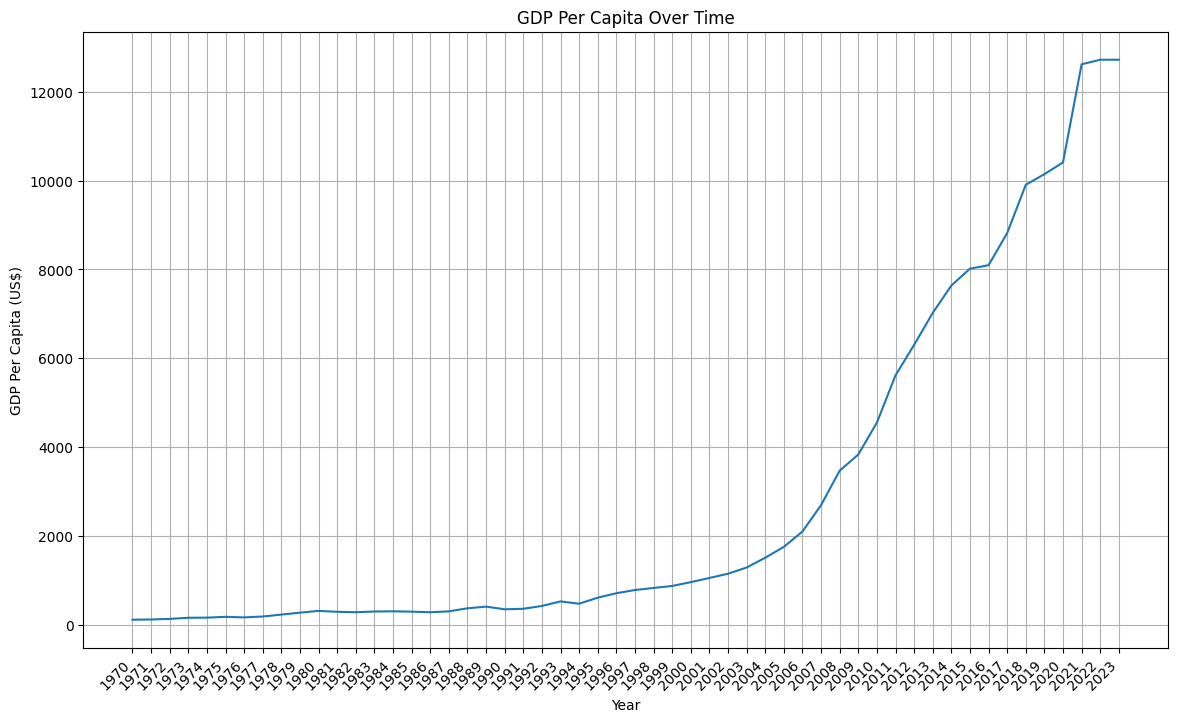

In [31]:
# Create a line graph using Seaborn
# Plot the GDP per capita over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Year', y='GDPPerCapita (US$)')

# Customize the plot
plt.title('GDP Per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita (US$)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right
plt.grid(True)

In [32]:
# In this plot, the GDP per capita has increased over time.
# There is a significant increase in GDP per capita from 2000 to 2020.


In [33]:
df.head()

Series Name,Country Name,Year,CleanFuelAccessRate,GDPPerCapita (US$),GDPPerCapitaGrowthRate,ImportsGDPRate,IndustryGrowthRate,InflationRate,LaborForce,LifeExpectancy,PopulationGrowthRate,TradeGDPRate,UnemploymentRate
0,China,1970,0.0,113.162578,16.050399,2.460850,34.6,7.233836,647240828.0,56.607,2.761676,4.952406,3.671239
1,China,1971,0.0,118.654144,4.159176,2.132769,12.4,7.233836,647240828.0,57.565,2.746916,4.920835,3.671239
2,China,1972,0.0,131.885559,1.290106,2.507444,6.7,7.233836,647240828.0,58.418,2.457357,5.755367,3.671239
3,China,1973,0.0,157.089111,5.327293,3.758798,8.3,7.233836,647240828.0,59.389,2.283395,8.000145,3.671239
4,China,1974,0.0,160.147688,0.218006,5.403685,1.4,7.233836,647240828.0,60.168,2.065955,10.333487,3.671239


# Feature Engineering 
This can improve my analysis or model performance.
It involves creating new features based on the existing columns


In [34]:
## Feature Engineering 1

# Calculate the GDP growth Inflation interaction call it `GDPGrowthInflationInteraction`
# The GDP per capita to inflation ratio can be used to measure the purchasing power of the population in a country.
# A higher GDP per capita and lower inflation rate indicate a stronger economy and higher purchasing power.

df['GDPGrowthInflationInteraction'] = df['GDPPerCapitaGrowthRate'] * df['InflationRate']

In [35]:
## Feature Engineering 2

# Create a new column 'HighGDPPerCapita' based on the mean of 'GDPPerCapita (US$)'
# If the GDP per capita is higher than the mean, assign 1; otherwise, assign 0
# This column can be used to classify GDP trend based on their GDP per capita.
threshold = df['GDPPerCapita (US$)'].mean()
# High_GDPPerCapita column
df['HighGDPPerCapita'] = (df['GDPPerCapita (US$)'] > threshold).astype(int)

In [36]:
df.head()

Series Name,Country Name,Year,CleanFuelAccessRate,GDPPerCapita (US$),GDPPerCapitaGrowthRate,ImportsGDPRate,IndustryGrowthRate,InflationRate,LaborForce,LifeExpectancy,PopulationGrowthRate,TradeGDPRate,UnemploymentRate,GDPGrowthInflationInteraction,HighGDPPerCapita
0,China,1970,0.0,113.162578,16.050399,2.460850,34.6,7.233836,647240828.0,56.607,2.761676,4.952406,3.671239,116.105949,0
1,China,1971,0.0,118.654144,4.159176,2.132769,12.4,7.233836,647240828.0,57.565,2.746916,4.920835,3.671239,30.086797,0
2,China,1972,0.0,131.885559,1.290106,2.507444,6.7,7.233836,647240828.0,58.418,2.457357,5.755367,3.671239,9.332414,0
3,China,1973,0.0,157.089111,5.327293,3.758798,8.3,7.233836,647240828.0,59.389,2.283395,8.000145,3.671239,38.536761,0
4,China,1974,0.0,160.147688,0.218006,5.403685,1.4,7.233836,647240828.0,60.168,2.065955,10.333487,3.671239,1.577017,0


In [37]:
df.tail()

Series Name,Country Name,Year,CleanFuelAccessRate,GDPPerCapita (US$),GDPPerCapitaGrowthRate,ImportsGDPRate,IndustryGrowthRate,InflationRate,LaborForce,LifeExpectancy,PopulationGrowthRate,TradeGDPRate,UnemploymentRate,GDPGrowthInflationInteraction,HighGDPPerCapita
49,China,2019,79.4,10143.86022,5.575317,17.480104,4.874621,2.899234,775321104.0,77.968,0.354741,35.890096,5.15,16.164149,1
50,China,2020,81.4,10408.71955,1.995558,16.168156,2.464251,2.419422,763684716.0,78.077,0.238041,34.754296,5.61,4.828097,1
51,China,2021,83.2,12617.50510,8.351720,17.358017,8.674305,0.981015,780370660.0,78.211,0.089252,37.301991,5.11,8.193164,1
52,China,2022,83.2,12720.21632,3.002576,17.466816,3.757085,1.973576,781808304.0,78.587,-0.013100,38.143818,5.11,5.925811,1
53,China,2023,83.2,12720.21632,3.002576,17.466816,3.757085,1.973576,779890786.0,78.587,-0.013100,38.143818,5.11,5.925811,1


In [38]:
df.columns

Index(['Country Name', 'Year', 'CleanFuelAccessRate', 'GDPPerCapita (US$)',
       'GDPPerCapitaGrowthRate', 'ImportsGDPRate', 'IndustryGrowthRate',
       'InflationRate', 'LaborForce', 'LifeExpectancy', 'PopulationGrowthRate',
       'TradeGDPRate', 'UnemploymentRate', 'GDPGrowthInflationInteraction',
       'HighGDPPerCapita'],
      dtype='object', name='Series Name')

In [39]:
# Create a new DataFrame with selected columns for analysis 
df = df[['GDPPerCapita (US$)', 'CleanFuelAccessRate', 'GDPPerCapitaGrowthRate', 
    'ImportsGDPRate', 'IndustryGrowthRate', 'InflationRate', 
    'LaborForce', 'LifeExpectancy', 'PopulationGrowthRate',
    'TradeGDPRate', 'UnemploymentRate','GDPGrowthInflationInteraction', 
    'HighGDPPerCapita']]

# Summary Statistics 

In [40]:
# Summary statistics of the DataFrame
df.describe()

Series Name,GDPPerCapita (US$),CleanFuelAccessRate,GDPPerCapitaGrowthRate,ImportsGDPRate,IndustryGrowthRate,InflationRate,LaborForce,LifeExpectancy,PopulationGrowthRate,TradeGDPRate,UnemploymentRate,GDPGrowthInflationInteraction,HighGDPPerCapita
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,5.400000e+01,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,2873.243126,27.677778,7.522009,14.493558,10.283699,5.495978,7.080609e+08,70.087167,1.061342,30.727692,3.671239,43.727165,0.296296
std,3902.905112,32.754690,3.608108,7.515155,5.914161,5.138138,5.942629e+07,6.189702,0.640551,16.733605,0.985025,55.663883,0.460911
min,113.162578,0.000000,-3.081322,2.132769,-2.400000,-1.401473,6.472408e+08,56.607000,-0.013100,4.920835,1.800000,-22.289776,0.000000
25%,295.544057,0.000000,6.183802,7.556286,6.198612,1.973576,6.472408e+08,66.003000,0.583123,15.115356,3.025000,9.253167,0.000000
50%,745.579225,0.000000,7.487533,15.626567,10.056481,5.185333,6.966513e+08,70.469000,1.035796,34.045857,3.689120,27.492744,0.000000
75%,4370.912322,57.525000,9.457712,18.501408,13.479879,7.233836,7.755296e+08,75.535000,1.424821,39.450881,4.175000,53.821578,1.000000
max,12720.216320,83.200000,16.050399,28.444187,34.600000,24.256990,7.818083e+08,78.587000,2.761676,64.478884,5.610000,285.417181,1.000000


# Unvariate Analysis

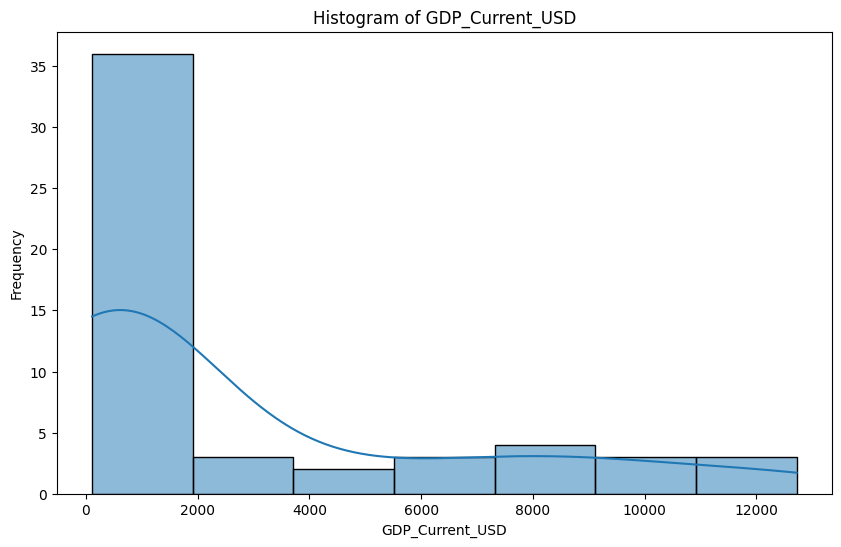

In [41]:
# Normality Check 
# choose the dependent variable for normality check
dependent_variable =df['GDPPerCapita (US$)']

# histogram
plt.figure(figsize=(10, 6))
sns.histplot(dependent_variable, kde=True)
plt.title('Histogram of GDP_Current_USD')
plt.xlabel('GDP_Current_USD')
plt.ylabel('Frequency')
plt.show()

In [42]:
# Normality Check
# Frequency range from 0 to little bit above 35
# GDP_Current_USD is not normally distributed and also range from 0 to 12000


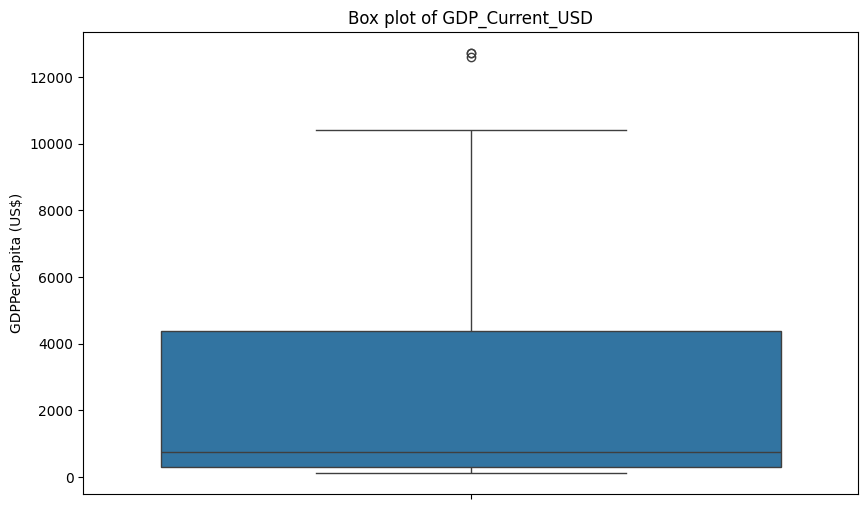

In [43]:
# Create the boxplot for the dependent variable
# 
plt.figure(figsize=(10, 6))
sns.boxplot(y='GDPPerCapita (US$)', data=df)
plt.title('Box plot of GDP_Current_USD')
plt.show()

In [44]:
# The boxplot shows that there are outliers in the GDP_Current_USD column.

In [45]:
# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the dataset to remove outliers
    df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return df

# Remove outliers from the dataset
df = remove_outliers_iqr(df)

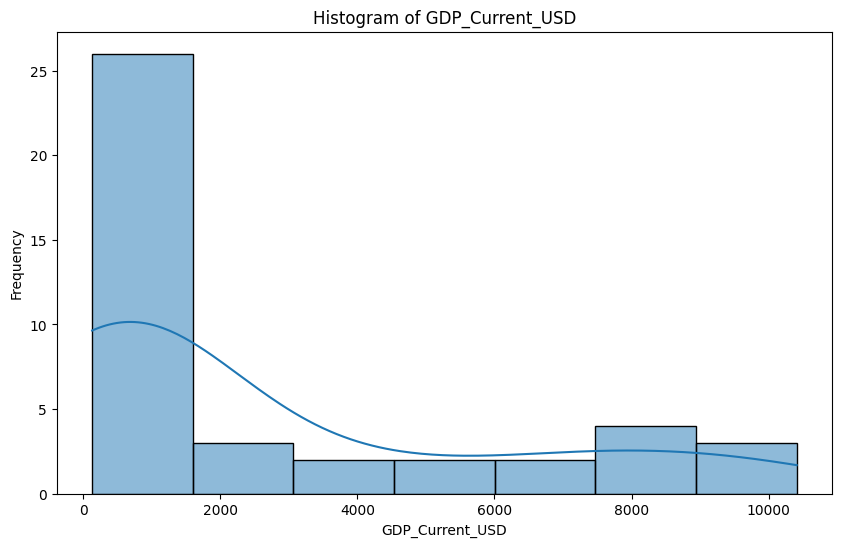

In [46]:
# Normality Check after removing outliers
# choose the dependent variable for normality check
dependent_variable =df['GDPPerCapita (US$)']

# histogram
plt.figure(figsize=(10, 6))
sns.histplot(dependent_variable, kde=True)
plt.title('Histogram of GDP_Current_USD')
plt.xlabel('GDP_Current_USD')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of GDP (Current USD) values over the observed period. The majority of the GDP values are clustered at the lower end, with a frequency peak around the $0 to $2000 range, and gradually decreasing as GDP values increase. This indicates that lower GDP values are more common, while higher GDP values are relatively rare in the dataset.

In [47]:
# Normality Check after removing outliers
# Frequency range from 0 to little bit above 25
# GDP_Current_USD is not normally distributed and also range from 0 to 12000

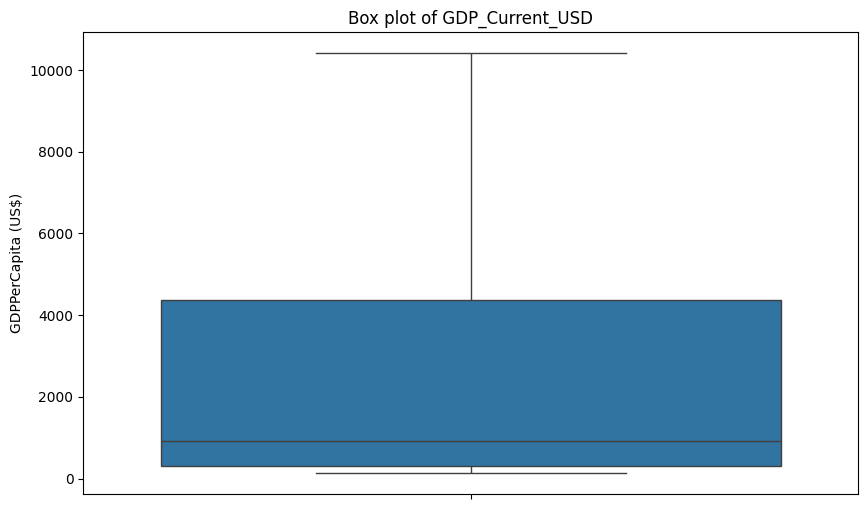

In [48]:
# Create the boxplot for the dependent variable after removing outliers

plt.figure(figsize=(10, 6))
sns.boxplot(y='GDPPerCapita (US$)', data=df)
plt.title('Box plot of GDP_Current_USD')
plt.show()

In [49]:
# The boxplot shows that there are no outliers in the GDP_Current_USD column after removing outliers.

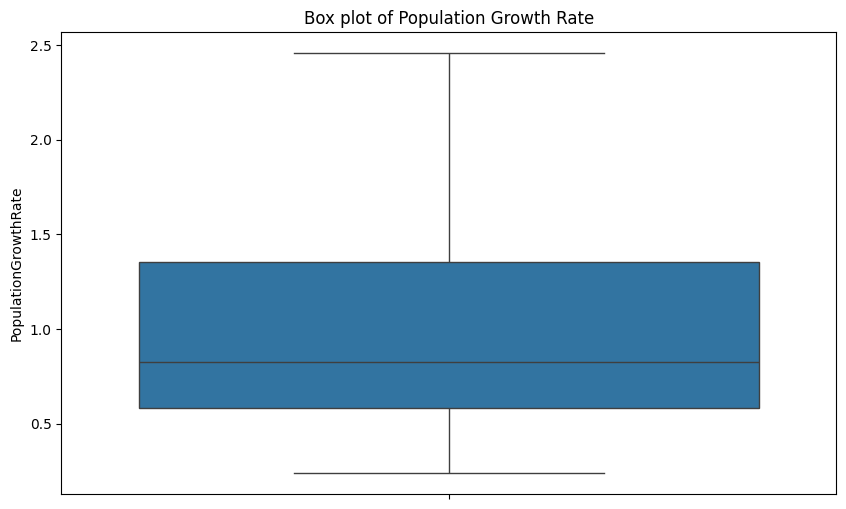

In [50]:
# Create the boxplot for the population growth rate
plt.figure(figsize=(10, 6))
sns.boxplot(y='PopulationGrowthRate', data=df)
plt.title('Box plot of Population Growth Rate')
plt.show()

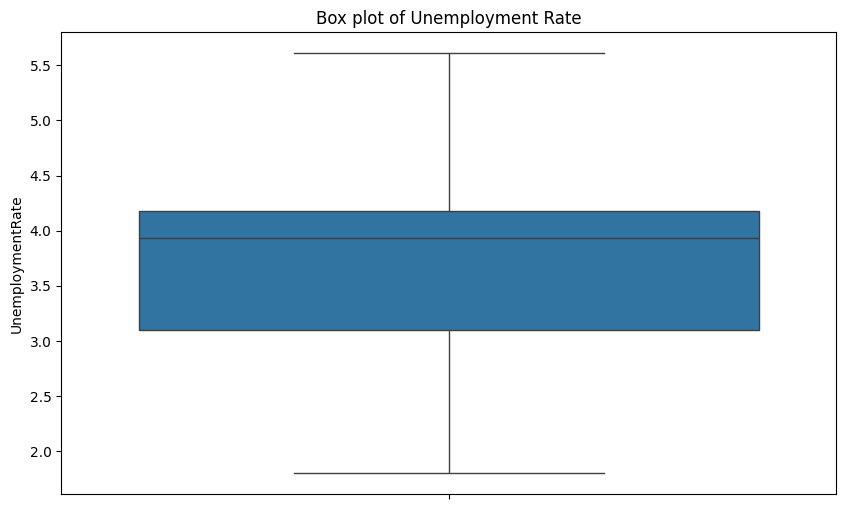

In [51]:
# Create the boxplot for the Unemployment rate
plt.figure(figsize=(10, 6))
sns.boxplot(y='UnemploymentRate', data=df)
plt.title('Box plot of Unemployment Rate')
plt.show()

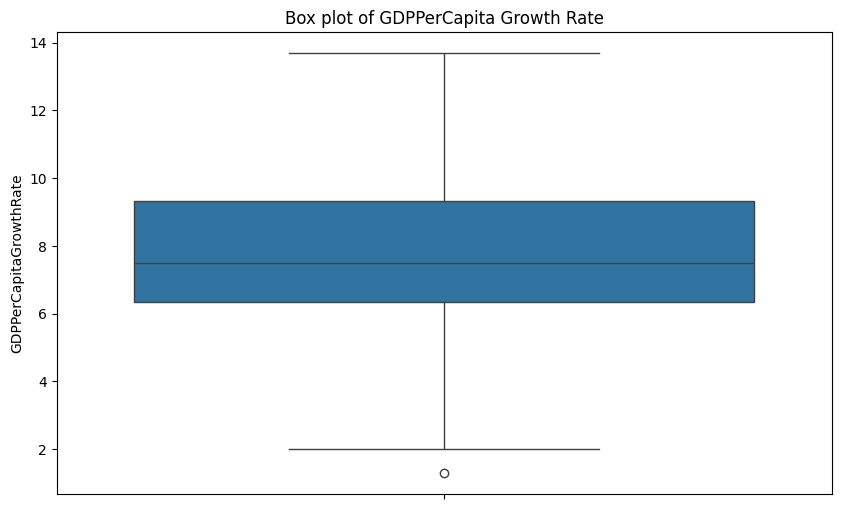

In [52]:
# Create the boxplot for the GDPPerCapita Growth Rate
plt.figure(figsize=(10, 6))
sns.boxplot(y='GDPPerCapitaGrowthRate', data=df)
plt.title('Box plot of GDPPerCapita Growth Rate')
plt.show()

In [53]:
df.columns

Index(['GDPPerCapita (US$)', 'CleanFuelAccessRate', 'GDPPerCapitaGrowthRate',
       'ImportsGDPRate', 'IndustryGrowthRate', 'InflationRate', 'LaborForce',
       'LifeExpectancy', 'PopulationGrowthRate', 'TradeGDPRate',
       'UnemploymentRate', 'GDPGrowthInflationInteraction',
       'HighGDPPerCapita'],
      dtype='object', name='Series Name')

# Bivariate Analysis

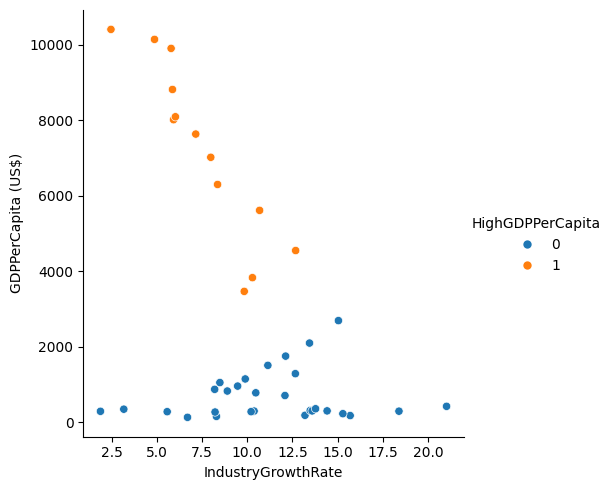

In [54]:
# scatter plot of GDPPerCapitaGrowthRate and GDPPerCapita (US$) 
# to see the relationship between the two variables 

sns.relplot(data=df, x="IndustryGrowthRate", y='GDPPerCapita (US$)', hue='HighGDPPerCapita')

In [55]:
# scatter plot of IndustryGrowthRate and GDPPerCapita (US$)


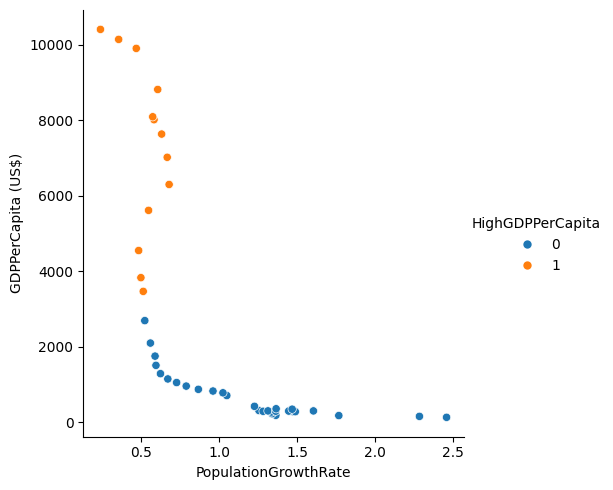

In [56]:
# scatter plot of PopulationGrowthRate and GDPPerCapita (US$)
sns.relplot(data=df, x="PopulationGrowthRate", y='GDPPerCapita (US$)', hue='HighGDPPerCapita')

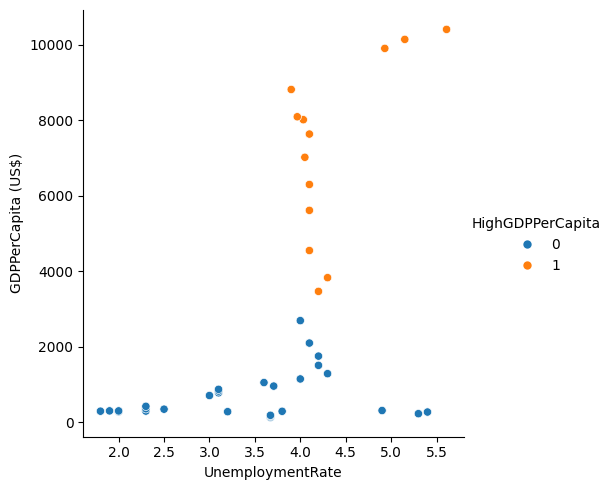

In [57]:
# scatter plot of UnemploymentRate and GDPPerCapita (US$)
sns.relplot(data=df, x="UnemploymentRate", y='GDPPerCapita (US$)', hue='HighGDPPerCapita')

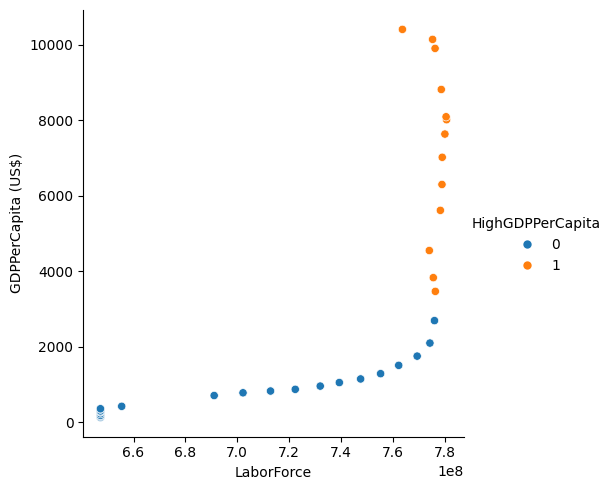

In [58]:
# scatter plot of LaborForce and GDPPerCapita (US$)
sns.relplot(data=df, x="LaborForce", y='GDPPerCapita (US$)', hue='HighGDPPerCapita')

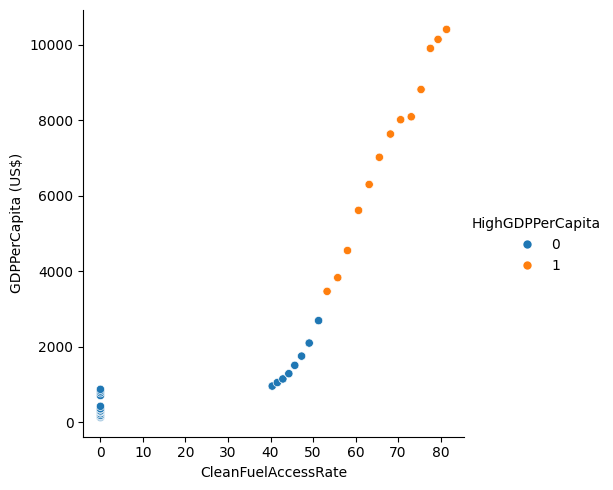

In [59]:
# scatter plot of CleanFuelAccessRate and GDPPerCapita (US$)
sns.relplot(data=df, x="CleanFuelAccessRate", y='GDPPerCapita (US$)', hue='HighGDPPerCapita')

The scatter plot shows a clear distinction between years with high GDP per Capita (marked in orange) and those with lower GDP per Capita (marked in blue) based on the CleanFuelAccessRate variable. Years with higher GDP per Capita tend to have a higher CleanFuelAccessRate, indicating a strong positive relationship between these two variables.

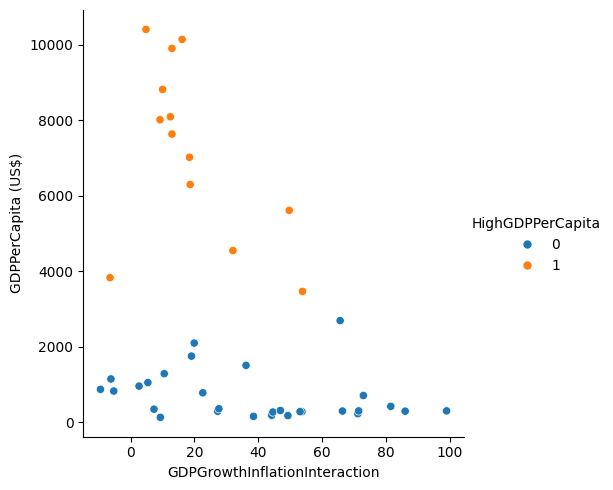

In [60]:
# scatter plot of GDPGrowthInflationInteraction and GDPPerCapita (US$)
sns.relplot(data=df, x="GDPGrowthInflationInteraction", y='GDPPerCapita (US$)', hue='HighGDPPerCapita')

The scatter plot shows a clear distinction between years with high GDP per Capita (marked in orange) and those with lower GDP per Capita (marked in blue) based on the GDPGrowthInflationInteraction variable. Years with higher GDP per Capita tend to have a higher GDPGrowthInflationInteraction value, indicating a potential positive relationship between these two variables.

In [61]:
df.columns

Index(['GDPPerCapita (US$)', 'CleanFuelAccessRate', 'GDPPerCapitaGrowthRate',
       'ImportsGDPRate', 'IndustryGrowthRate', 'InflationRate', 'LaborForce',
       'LifeExpectancy', 'PopulationGrowthRate', 'TradeGDPRate',
       'UnemploymentRate', 'GDPGrowthInflationInteraction',
       'HighGDPPerCapita'],
      dtype='object', name='Series Name')

##  Correlation Analysis

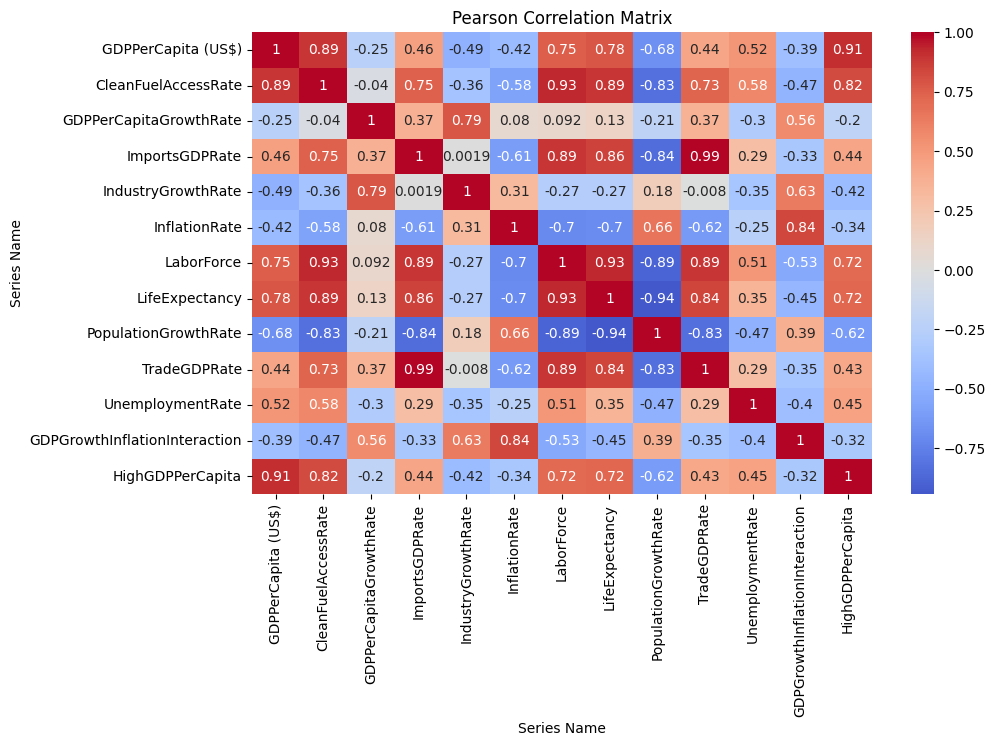

In [62]:
# Pearson correlation
# Calculate the correlation matrix
pearson_corr = df.corr(method='pearson')

# Visualizing the Pearson correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

We can observe the following pairs with high correlation coefficients, suggesting potential multicollinearity:

    GDPPerCapita (US$) and CleanFuelAccessRate: Correlation = 0.89
    ImportsGDPRate and TradeGDPRate: Correlation = 0.99
    CleanFuelAccessRate and LifeExpectancy: Correlation = 0.89
    LaborForce and LifeExpectancy: Correlation = 0.93
    LifeExpectancy and PopulationGrowthRate: Correlation = -0.94

In [63]:
# I will address the multicollinearity issue by dropping highly correlated variables 
# It will reduce multicollinearity, improve the model performance and interpretability.
# I will drop the variables CleanFuelAccessRate, ImportsGDPRate, LaborForce, and PopulationGrowthRate

# Drop highly correlated features
df = df.drop(columns=['CleanFuelAccessRate', 'ImportsGDPRate', 'LaborForce', 'PopulationGrowthRate'])

# Display the first few rows of the reduced dataset
df.head()

Series Name,GDPPerCapita (US$),GDPPerCapitaGrowthRate,IndustryGrowthRate,InflationRate,LifeExpectancy,TradeGDPRate,UnemploymentRate,GDPGrowthInflationInteraction,HighGDPPerCapita
2,131.885559,1.290106,6.700000,7.233836,58.418,5.755367,3.671239,9.332414,0
3,157.089111,5.327293,8.300000,7.233836,59.389,8.000145,3.671239,38.536761,0
5,178.339614,6.816441,15.700000,7.233836,60.917,9.554203,3.671239,49.309010,0
7,185.420537,6.114002,13.200000,7.233836,62.538,8.384615,3.671239,44.227683,0
8,228.519313,9.846157,15.296014,7.233836,63.218,9.650142,5.300000,71.225479,0


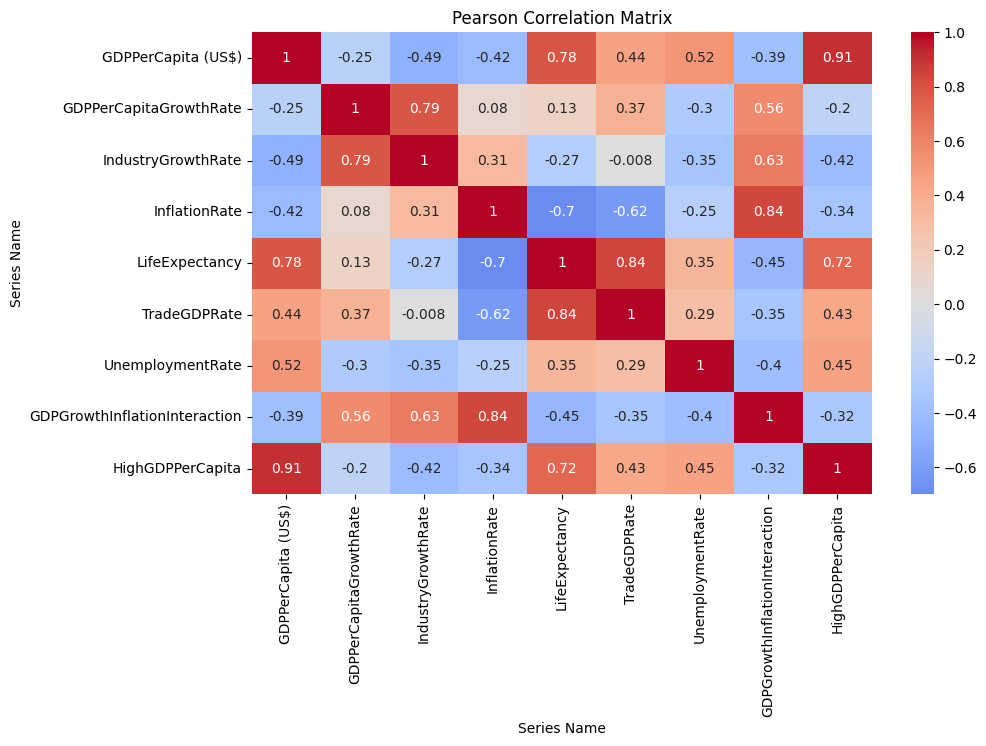

In [64]:
# Pearson correlation after I dropped the correlated variables
# Calculate the correlation matrix
pearson_corr = df.corr(method='pearson')

# Visualizing the Pearson correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

In [65]:
# We can observe that the correlation between the variables has reduced after dropping the highly correlated variables.

In [66]:
df.columns

Index(['GDPPerCapita (US$)', 'GDPPerCapitaGrowthRate', 'IndustryGrowthRate',
       'InflationRate', 'LifeExpectancy', 'TradeGDPRate', 'UnemploymentRate',
       'GDPGrowthInflationInteraction', 'HighGDPPerCapita'],
      dtype='object', name='Series Name')

# Multivariate Analysis

<Figure size 1000x600 with 0 Axes>

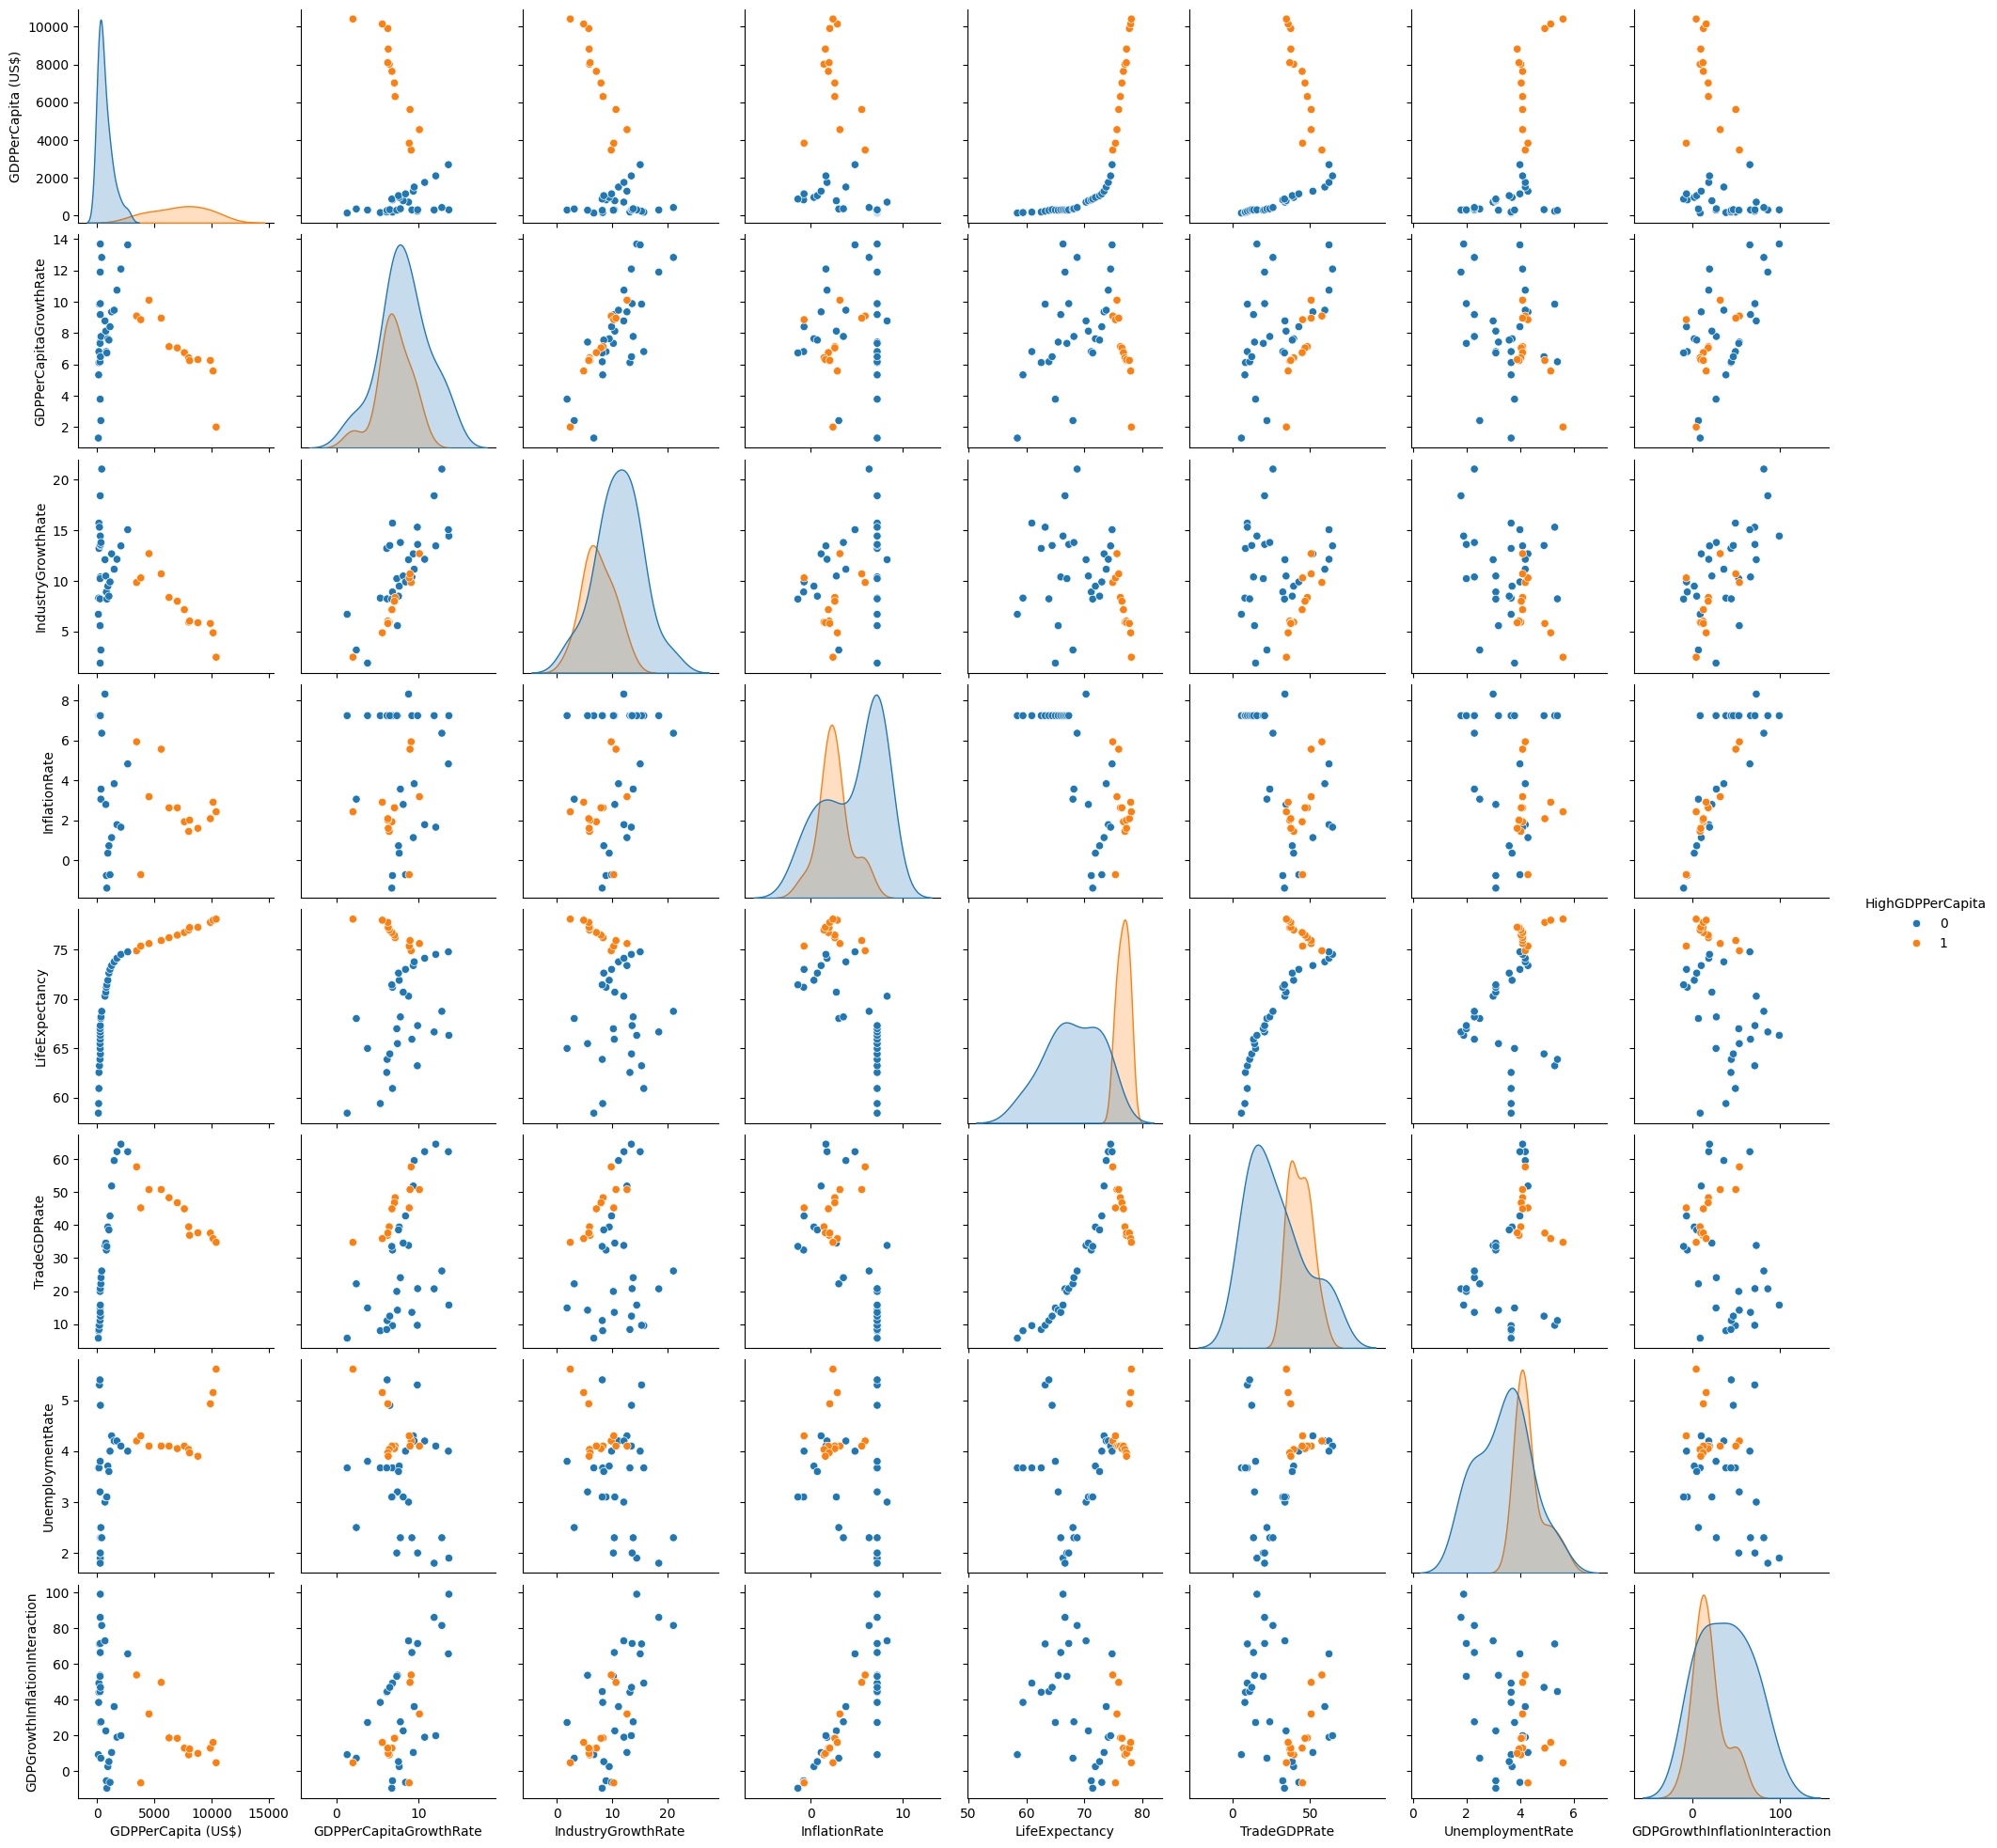

In [67]:
# create Pairewise plots to visualize the relationship between the variables
# Pairwise plots
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='HighGDPPerCapita')
plt.show()

In [68]:
# the dataset is ready for modeling 
# I will save the cleaned dataset to a new CSV file for further analysis
df.to_csv('cleaned_df.csv', index=False)

# Modeling 
The regression model is an ideal choice for my project, which aims to predict GDP per Capita using various economic factors. I plan to develop three different models using three distinct methods: Multiple Linear Regression, Lasso Regression, and Elastic Net Regression.

First, Multiple Linear Regression will allow me to predict GDP per Capita by considering several independent variables simultaneously. Next, Lasso Regression will also use multiple variables, but it will help prevent overfitting by minimizing the impact of less important variables. Lastly, Elastic Net Regression is particularly useful when many features are correlated, as it effectively handles these correlations to predict GDP per Capita more accurately. By employing these three methods, I aim to create robust and reliable models for predicting economic outcomes.

# Evaluation
Two important metrics for evaluating the performance of our regression models are R-squared and Root Mean Squared Error (RMSE). R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Its values range from 0 to 1, with higher values indicating a better fit of the model. RMSE, on the other hand, provides the error in the same units as the dependent variable, making it more interpretable. Lower RMSE values indicate better model performance. By examining both R-squared and RMSE, we can assess the accuracy and reliability of our models effectively.

# Evaluate Appropriate Ethical use of data
In the analysis of GDP per Capita and other economic indicators, it is crucial to ensure that data practices are fair and unbiased. This requires vigilance in checking data and models to ensure they treat all features fairly and accurately. Various indicators, such as Inflation Rate, Life Expectancy, and Population Growth Rate, are used to predict GDP per Capita. To maintain fairness, data and algorithms are rigorously tested for biases that could lead to unfair or incorrect predictions. This ensures that economic growth indicators are reliable and accurately represent the true state of the economy across all features. By focusing on bias and fairness, the aim is to provide insights that are just and equitable, thereby contributing to more accurate and ethical decision-making in economic analyses. This approach ensures that predictions and conclusions are trustworthy and inclusive.

# Resources
- https://pandas.pydata.org/
- https://franklin.instructure.com/courses/16564
- Provost, F., & Fawcett, T. (2013). Data Science for Business: What You Need to Know about Data Mining and Data-Analytic Thinking. O'Reilly Media.
- https://databank.worldbank.org/source/world-development-indicators 